# Predicting House Prices

#### Problem Description: 

Predict House Prices Using Linear Regression.


#### Solution:

Create a model that will allow us to enter a few features of a house and be able to provide an estimate how much that house would sell for (price).


#### Conclusion:

We see a positive correlatation between Avg. Area Income and price of a house (R value = 0.64). Avg. Area Income, when compared to the other variables, shows the strongest correlation to housing price. 

The linear regression model was trained on this data. The results obtained, when comparing the actual test (y) values with what was predicted (y-hat) by this model using test data (X), was an R-squared value of 0.918. This shows that this model fit the test data pretty well. R-squared tells you the amount (%) of variability in y that is explained by the model. When a regression model accounts for more of the variance, the data points are closer to the regression line, which means better fit.

### How to get Data

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import seaborn as sns

In [48]:
df = pd.read_csv('USA_Housing.csv')

In [49]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


### Exploratory Data Analysis (EDA)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [51]:
df.isnull().sum() # how many nulls in df...207 under total_bedrooms

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

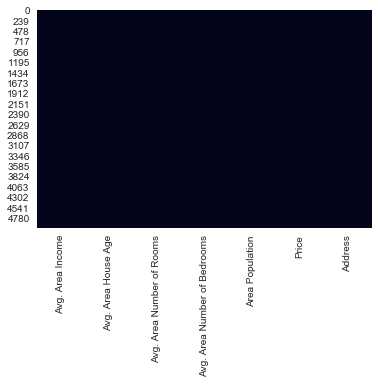

In [52]:
#heatmap visualization of nulls
sns.heatmap(df.isnull(),cbar=False)

In [53]:
# must eliminate records with null values # if any null values exist, drop those records
#df = df.dropna(how='any',axis=0); No nulls so N/A

# How many records have been dropped?
#calc = ((20433/20640) * 100)
#print(calc) # 98% of data still intact

In [54]:
# Drop features that are not necessary for prediction

del df['Address']

In [55]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


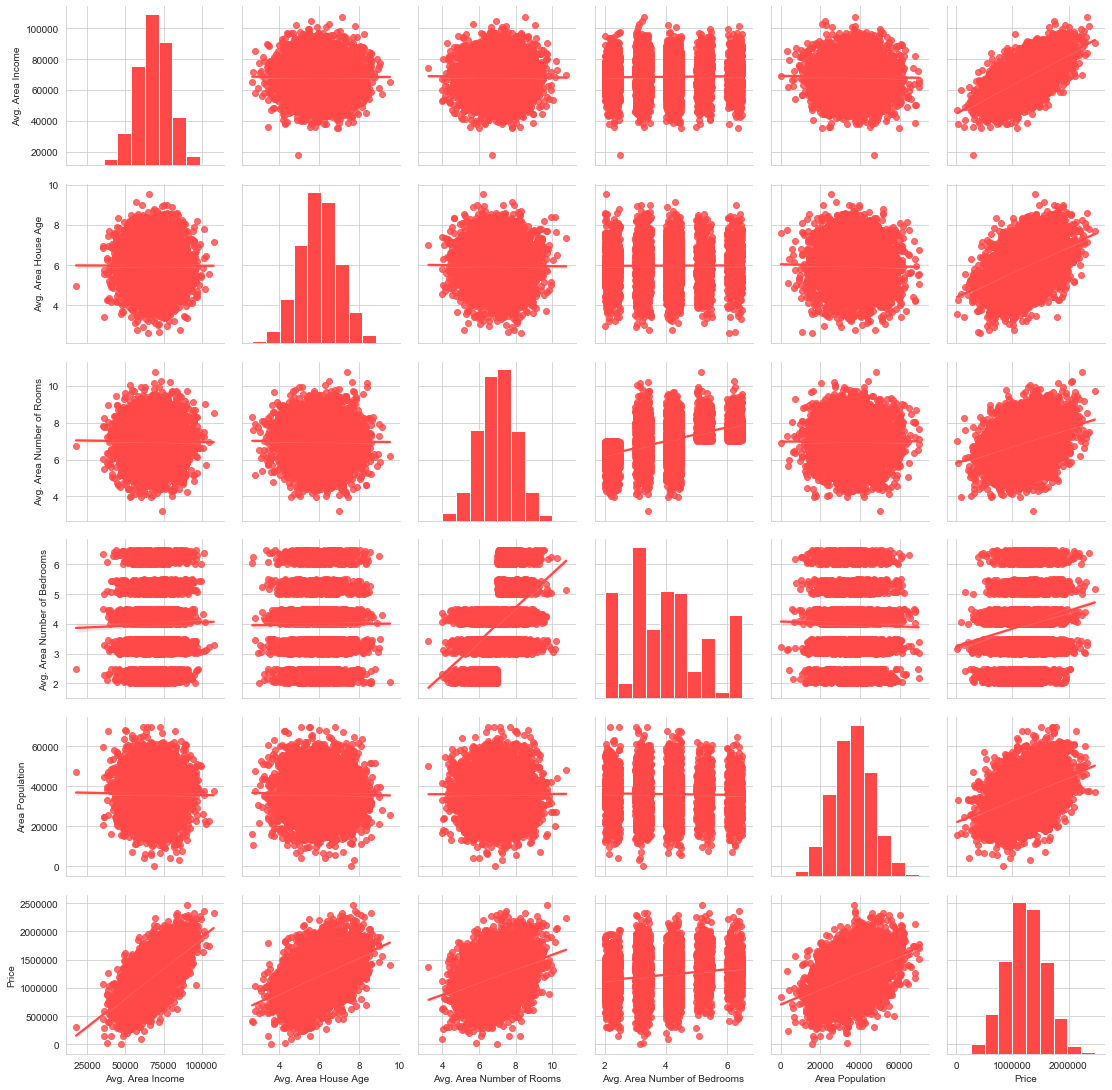

In [56]:
import scipy.stats as stats
# This pairplot gives us an big picture-- how each feature correlates with one another.
sns.pairplot(data=df,palette= 'muted',kind='reg') 

Based on the pairplot above, we can see that we should focus on: Avg. Area Income, Avg Area House Age, Avg Area Number of Rooms, and Area Population since these variables correlate with the price of the house to some extent, which is what I am measuring in this project. 

To further narrow down which features would most correlate (either negatively or positively) with the housing price, I used the joint plot to measure each feature against the price variable, below.

#### Avg. Area Income vs. Price

In [57]:
sns.set_palette("colorblind") # set the color of the figure
sns.set_style('whitegrid')  # set the style of the figure

/Users/afra/Desktop/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


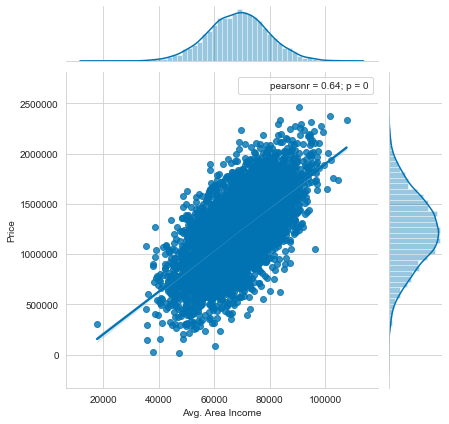

In [58]:
jplot= sns.jointplot(x='Avg. Area Income', y= 'Price', data=df,kind='reg')
jplot.annotate(stats.pearsonr)
plt.show() #pearsonr = 0.64

#### Avg. Area House Age vs. Price

In [59]:
sns.set_palette("bwr_r") # set the color of the figure
sns.set_style('whitegrid')  # set the style of the figure

/Users/afra/Desktop/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


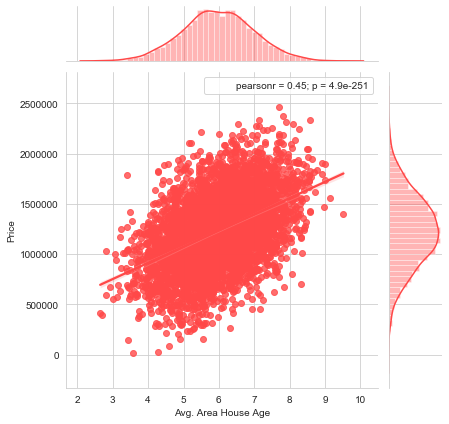

In [60]:
jplot1 = sns.jointplot(x='Avg. Area House Age', y= 'Price', data=df,kind='reg')
jplot1.annotate(stats.pearsonr)
plt.show() #pearsonr = 0.45

#### Avg. Area Number of Rooms vs. Price

In [61]:
sns.set_palette("RdYlBu_r") # set the color of the figure
sns.set_style('whitegrid')  # set the style of the figure

/Users/afra/Desktop/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


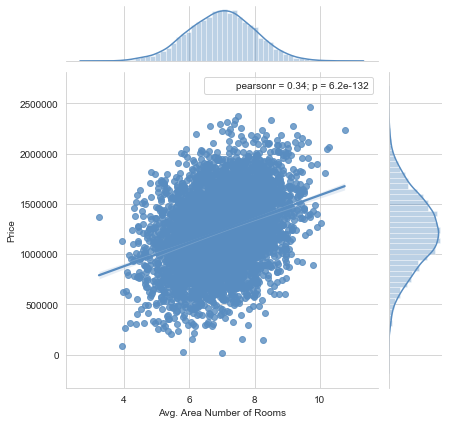

In [62]:
jplot2 = sns.jointplot(x='Avg. Area Number of Rooms', y= 'Price', data=df,kind='reg')
jplot2.annotate(stats.pearsonr)
plt.show() #pearsonr = 0.34

#### Area Population vs. Price

In [63]:
sns.set_palette("bwr_r") # set the color of the figure
sns.set_style('whitegrid')  # set the style of the figure

/Users/afra/Desktop/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


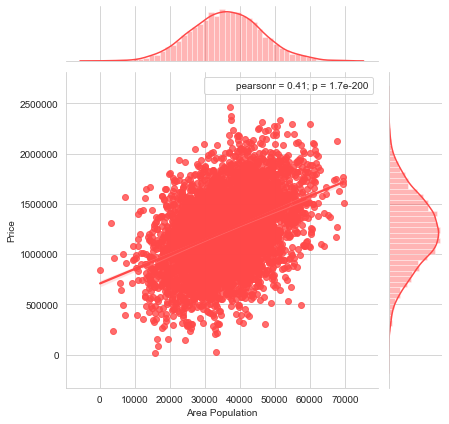

In [64]:
jplot3 = sns.jointplot(x='Area Population', y= 'Price', data=df,kind='reg')
jplot3.annotate(stats.pearsonr)
plt.show() #pearsonr = 0.41

Based on the four joint plots above, we can obviously see the strongest correlation between Avg. Area Income and Price, with the pearson correlation coefficent = 0.64; a postive correlation. This means that as the average area income increases, we will see an increase in the housing price as well.

NOTE: can also using a linear regression plot to take a closer look at the correlation between Avg. Area Income and Price

linepl = sns.lmplot(x='Avg. Area Income',y='Price', data=df)

### Training and Testing the Linear Model

#### Training and Testing the Data; going to split data into training and testing data sets

In [65]:
y = df['Price'] # outcome (dep) variable

In [66]:
X = df[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Area Population']] # indp variables

#### Use the model_selection.train_test_split from sklearn to split the data into training and testing sets. 

Set test_size=0.3 and random_state=101

Test size: 30% and Training size: 70%

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =101)

#### Train our model now by Importing LinearRegression from sklearn.linear_model

In [69]:
from sklearn.linear_model import LinearRegression

#### Create an instance of a LinearRegression() model named lm.

In [70]:
lm = LinearRegression()

#### Train/fit lm on the training data

In [71]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### The coefficient(s) represents the slope(s) of the graph for each feature.

NOTE: These coefficients are in in exponent form (e^)

In [72]:
print('Coefficients: \n', lm.coef_) # These coefficients correspond to the X-train columns/features.

Coefficients: 
 [2.16186171e+01 1.65268963e+05 1.22155472e+05 1.52203908e+01]


In [73]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Area Income,21.618617
Avg. Area House Age,165268.963373
Avg. Area Number of Rooms,122155.471708
Area Population,15.220391


Interpreting the coefficients: 

*Holding all other features fixed*

- A unit increase in Avg. Area Income is associated with an increase of $21.62 price of the house.

- A unit increase in Avg. Area House Age is associated with an increase of $165,268.96 price of the house.

- A unit increase in Avg. Area Number of Rooms is associated with an increase of $122,155.47 price of the house.

- A unit increase in Area Population is associated with an increase of $15.22 price of the house.

In [74]:
print('Intercepts: \n',lm.intercept_)

Intercepts: 
 -2641562.1663696812


Above, is the y-intercept (where the line crosses the y-axis of the linear regression plot)

#### Predicting the test data: predicting off of the test values!

In [75]:
predictions = lm.predict(X_test)

In [76]:
df_actual_vs_pred = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df_actual_vs_pred.head(10)

,Actual,Predicted
1718,1.251689e+06,1.259058e+06
2511,8.730483e+05,8.200460e+05
345,1.696978e+06,1.744063e+06
2521,1.063964e+06,9.722554e+05
54,9.487883e+05,9.915776e+05
2866,7.300436e+05,6.427426e+05
2371,1.166925e+06,1.077671e+06
2952,7.054441e+05,8.535972e+05
45,1.499989e+06,1.447135e+06
4653,1.288199e+06,1.204382e+06


### Evaluating the Model

Evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

In [77]:
from sklearn.metrics import r2_score

r2_results = r2_score(y_test, predictions)
print(r2_results) # good level of correlation

0.918463524908833


In [78]:
from sklearn import metrics
import numpy as np

# Mean Average Error-easiest to understand because it's the average error
print('MAE:', metrics.mean_absolute_error(y_test, predictions)) 

# Mean Squared Error- punisheds large errors
print('MSE:', metrics.mean_squared_error(y_test, predictions)) 

# Root Mean Squared Error-is most popular because RMSE is interpretable in the "y" units. 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions))) 

MAE: 81268.89606138285
MSE: 10174437569.110308
RMSE: 100868.41710421705


### Conclusion

Explore the residuals by plotting a histogram of the residuals to make sure it looks normally distributed = means everything was okay with our data and that we got a very good fit. Residual (Error) are the differences between observed and predicted values of data. Residuals are used to assess the quality of a model. The R-squared value is 0.918; this model seems to fit test data pretty well.

#### Density Plot of Residules

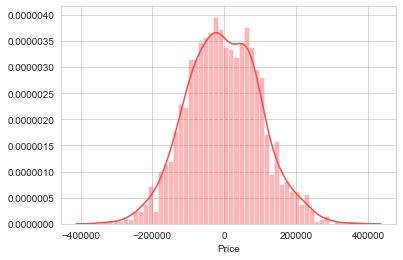

In [79]:
# Density plot for fit may be misleading...as in not always accurate in showing whether the model fits data well; therefore must check using 
# residule plot (in green)

sns.distplot((y_test-predictions),bins=50); # We got a pretty normally distributed plot

#### Creating a scatter plot real test values vs. predicted values

Text(0, 0.5, 'Predictions')

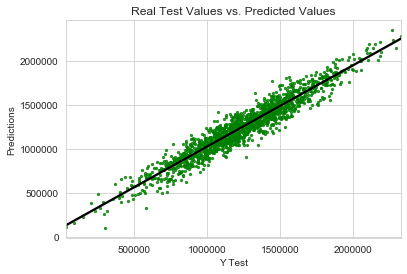

In [80]:
sns.regplot(y_test,predictions,scatter_kws={"color": "green","s": 5}, line_kws={"color": "black"}, 
            marker='o')
plt.title('Real Test Values vs. Predicted Values')
plt.xlabel('Y Test')
plt.ylabel('Predictions')

#plt.scatter(y_test,predictions)